#####  Peerloankart is an NBFC which facilitates peer-to-peer loans. It connects people who need to borrow(borrowers) with people who have money(investors).As an investor,you would want to invest in people who showed a profile of having a high probability of paying you back. Create a model which will help you predict whether a borrower will repay back the loan.

* fico: credit score given by the credit rating organisation FICO
* credit.policy: 1 if the customer meets the criteria for credit underwriting as specified by FICO
*  purpose: The purpose of taking the loan
* not.fully.paid(The previous loan): The dv, its 1 which implies the borrower will not repay back the loan.(0 - fully paid the previous loan)
* 1 - did not pay the previous loan)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
loans=pd.read_csv('loan_borowwer_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
dataset=loans.filter(['credit.policy','purpose','fico','not.fully.paid'],axis=1)
dataset.head()

,credit.policy,purpose,fico,not.fully.paid
0,1,debt_consolidation,737,0
1,1,credit_card,707,0
2,1,debt_consolidation,682,0
3,1,debt_consolidation,712,0
4,1,credit_card,667,0


In [4]:
dataset.shape

(9578, 4)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   credit.policy   9578 non-null   int64 
 1   purpose         9578 non-null   object
 2   fico            9578 non-null   int64 
 3   not.fully.paid  9578 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 299.4+ KB


In [6]:
dataset['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

In [7]:
dataset['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

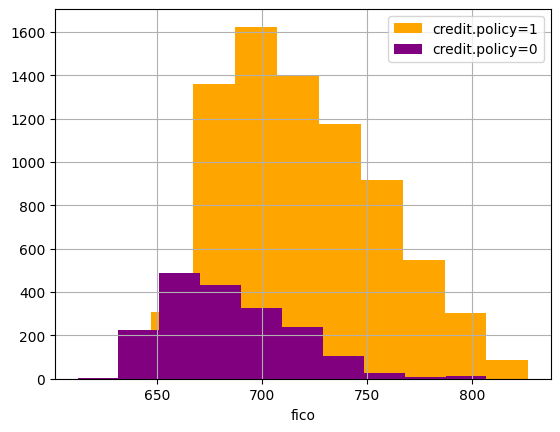

In [8]:
##analyse the relationship between credit policy and fico:
dataset[dataset['credit.policy']==1]['fico'].hist(color='orange',label='credit.policy=1')
dataset[dataset['credit.policy']==0]['fico'].hist(color='purple',label='credit.policy=0')
plt.legend()
plt.xlabel('fico')
plt.show()

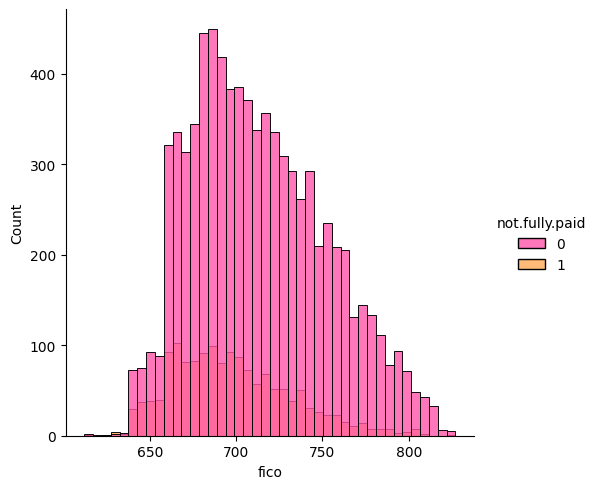

In [9]:
### compare between a categorical and a continuous variable:
import seaborn as sns
sns.displot(data=dataset,
            x='fico',
            hue='not.fully.paid',
            alpha=0.8,
           palette='spring')
plt.xlabel('fico')
plt.show()

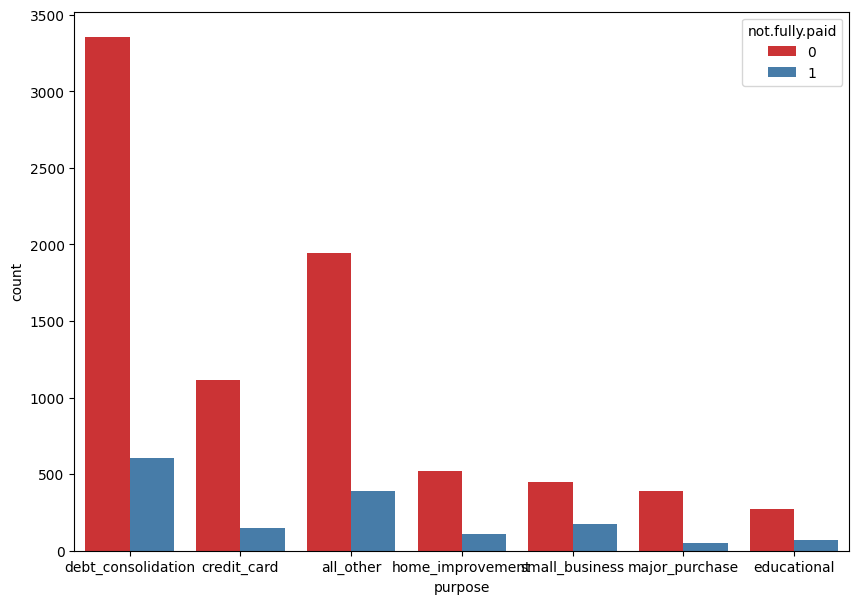

In [10]:
#exploring the relationship between purpose and the DV(not.fully.paid):
plt.figure(figsize=(10,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=dataset,palette='Set1')
plt.show()

In [11]:
### small_business is the riskiest category

In [12]:
categorical_variable=['purpose']

In [13]:
data_final=pd.get_dummies(dataset,columns=categorical_variable,drop_first=True,dtype=int)
data_final.head()

,credit.policy,fico,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,737,0,0,1,0,0,0,0
1,1,707,0,1,0,0,0,0,0
2,1,682,0,0,1,0,0,0,0
3,1,712,0,0,1,0,0,0,0
4,1,667,0,1,0,0,0,0,0


In [14]:
X=data_final.drop('not.fully.paid',axis=1)

In [15]:
y=data_final['not.fully.paid']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=0)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [20]:
pred=dt.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2406
           1       0.30      0.02      0.04       468

    accuracy                           0.83      2874
   macro avg       0.57      0.51      0.47      2874
weighted avg       0.75      0.83      0.77      2874



In [23]:
cm=confusion_matrix(y_test,pred)

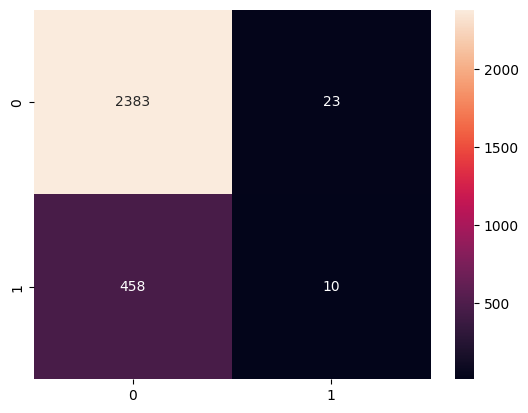

In [24]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel=('Actuals')
plt.ylabel=('Prediction')
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
Predictions=rfc.predict(X_test)
print(classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2406
           1       0.33      0.03      0.05       468

    accuracy                           0.83      2874
   macro avg       0.58      0.51      0.48      2874
weighted avg       0.76      0.83      0.77      2874



<BarContainer object of 8 artists>

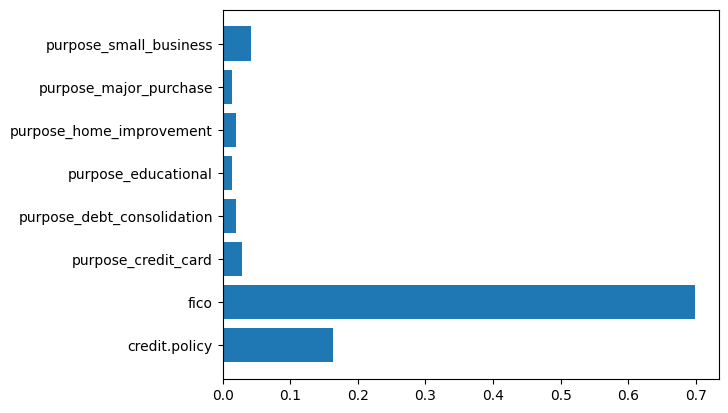

In [27]:
plt.barh(X.columns,rfc.feature_importances_)

In [28]:
sorted_index=rfc.feature_importances_.argsort()

<BarContainer object of 8 artists>

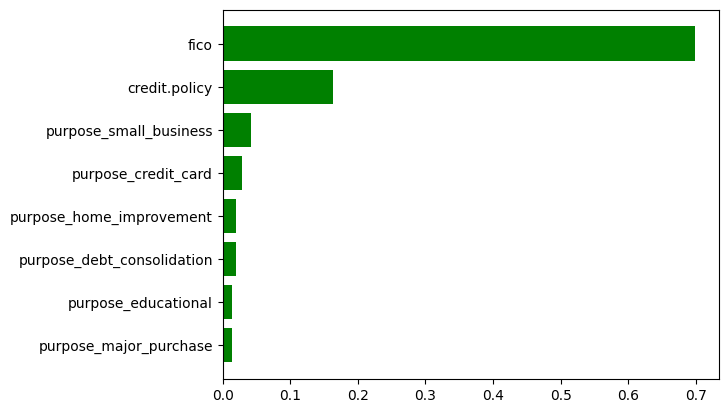

In [29]:
plt.barh(X.columns[sorted_index],rfc.feature_importances_[sorted_index],color='g',align='center')
#plt.xlabel('feature importances_')

In [30]:
#getting list of hyper parameter
print(rfc.get_params())


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [34]:
#plugging values
n_estimators=[200,500]
max_features=[0.3,0.6]
max_depth=[3,5,7]
max_samples=[0.5,1,0.8,1.8]
criterion=['gini','entropy']
random_state=[0,50,42]
param_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'max_samples':max_samples,'random_state':random_state}
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=5,n_jobs=1)

import warnings
warnings.filterwarnings('ignore')
rf_grid.fit(X_train,y_train)

# rebuilding the model on our optimal values:\n",
rfc=RandomForestClassifier(max_depth=5,
                        max_features=0.6,
                        max_samples=0.5,
                        n_estimators=200,
                        random_state=42)










[200, 500]

In [35]:
rf_grid.best_score_

0.8411397152937772

In [39]:
from sklearn.model_selection import RandomizedSearchCV


In [42]:
rfc_grid1=RandomizedSearchCV(estimator=rfc,cv=5,n_jobs=1,param_distributions=param_grid)

In [43]:
rfc_grid1.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'max_features': [0.3, 0.6],
                                        'max_samples': [0.5, 1, 0.8, 1.8],
                                        'n_estimators': [200, 500],
                                        'random_state': [0, 50, 42]})

In [45]:
rfc_grid1.best_score_

0.8411396039934556